In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
import random

{'L0': 42.96537549801543, 'L1': 80.07332803847042, 'L2': 51.17370312735525, 'L3': 61.88518889219434, 'L4': 62.901058258489854, 'L5': 33.48936968329911, 'L6': 51.441577894279504, 'L7': 56.87192439055309, 'L8': 52.19902458335864, 'L9': 27.47792634069239, 'L10': 52.646995189674726, 'L11': 64.25084217171599, 'L12': 157.88383516698084, 'L13': 66.01176610042303, 'L14': 127.9557158204661, 'L15': 1.819912716125182, 'L16': 49.681640491965666, 'L17': 47.43026725242582, 'L18': 9.381828595723722, 'L19': 42.28132164853005, 'L20': 13.07908360659435, 'L21': 15.345584229803322, 'L22': 82.63312121149065, 'L23': 33.818372709737964, 'L24': 139.70110631810655, 'L25': 43.10207823471501, 'L26': 89.58888206362943, 'L27': 21.72881207686194, 'L28': 17.573108047868267, 'L29': 17.16732065389898} {'L0': 3.4372300398412348, 'L1': 6.405866243077634, 'L2': 4.09389625018842, 'L3': 4.950815111375547, 'L4': 5.032084660679188, 'L5': 2.6791495746639287, 'L6': 4.11532623154236, 'L7': 4.549753951244248, 'L8': 4.17592196666

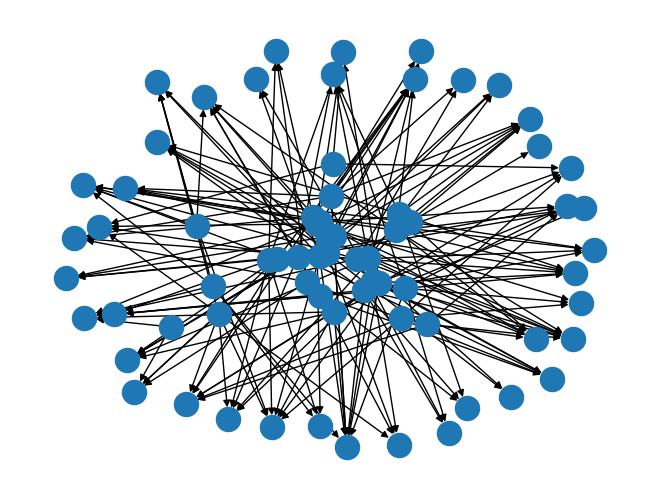

In [44]:
# BUILD A NETWORK

# different parameters, can be changed 
n_lenders = 30
n_borrowers = 40
p_edge_exists = 0.15
average_exposure = 10
recovery_rate = 0.4
equity_fraction = 0.08
borrowing_funding_threshold_fraction = 0.5

# create a bipartite graph (lenders -> borrowers)
G = nx.DiGraph() # set it up

lenders = []
for i in range(n_lenders):
    lenders.append("L" + str(i))

borrowers = []
for i in range(n_borrowers):
    borrowers.append("B" + str(i))

# add these lenders & borrowers to our graph
G.add_nodes_from(lenders, bipartite="lender", type="lender")
G.add_nodes_from(borrowers, bipartite="borrower", type="borrower")


# randomly generate exposures (aka weights)
for L in lenders:
    for B in borrowers:
        if np.random.rand() < p_edge_exists: # generate a probability in [0,1], compare to typical exposure size
            exposure = np.random.exponential(scale=average_exposure) # draws a sample from exponential distribution (lambda = average_exposure here) which will be the amount a lender has lent to a borrower
            G.add_edge(L, B, exposure=exposure) # adding a edge from lender to borrower if it exists with our randomly generated weight

nx.draw(G)  

# compute lenders' assets and equity

lenders_assets = {} # create an empty dict that we can add each lender's assets to
for L in lenders:
    total_exposure = 0
    for B in G.successors(L):
        total_exposure += G.edges[L,B]["exposure"]
    lenders_assets[L] = total_exposure

lenders_equity = {}
for L in lenders:
    equity = equity_fraction * lenders_assets[L] # calculating the equity lenders will hold as equity
    lenders_equity[L] = equity

print(lenders_assets, lenders_equity)


# compute borrowers' funding and borrower fragility thresholds in a similar way
borrowers_funding = {}
for B in borrowers:
    total_funding = 0
    for L in G.predecessors(B):
        total_funding += G.edges[L,B,]["exposure"]
    borrowers_funding[B] = total_funding


borrowers_funding_limits = {}
for B in borrowers:
    limit = borrowing_funding_threshold_fraction * borrowers_funding[B]
    borrowers_funding_limits[B] = limit

# store these original values for reference later in analysis
orig_lenders_equity = lenders_equity.copy()
orig_borrowers_funding = borrowers_funding.copy()
